# Multi-class classification




In [89]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

plt.rcParams['figure.figsize'] = (6.0, 6.0) # set default size of plots

X.shape = (400, 3)
Y.shape = (400,)


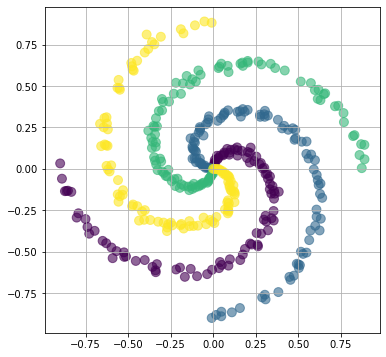

In [90]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 4 # number of classes
X = np.zeros((N*K,D))
Y = np.zeros(N*K, dtype='uint8')
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4.7,(j+1)*4.7,N) + np.random.randn(N)*0.1 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    Y[ix] = j
X = X*0.9
X = np.c_[np.ones(X.shape[0]),X] # add 'ones' column to X
fig = plt.figure()
plt.scatter(X[:, 1], X[:, 2], c=Y, s=80, alpha=0.6)
plt.grid()

print('X.shape =',X.shape)
print('Y.shape =',Y.shape)

### (Fully Connected) Neural Network

Implement all the methods needed to train our MLP, where:

- the number of hidden layers is variable (like in ex.3) 

- the activation of the hidden layer is: g(z)=ReLU(z), (instead of sigmoid)

- the output layer is a 'softmax' layer with multiple units (for multiclass classification)

- Use batch learning (use **all** training samples for each update step)

Break your code down to several methods (like in ex.3).

In [91]:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True) 

def relu(z):
    g = np.maximum(0,z)
    return g

def d_relu (z): 
    dg=(z>0)*1
    return dg
def loss(y,s): # softmax loss
    L = -np.log(s[range(len(y)),y])
    return L

In [92]:
def forward_propagation(x, W):
    N = (len(W))
    z = [None] * N
    a = [None] * N
    for i in x:
        a[0]=x
    for l in range(1,N):
        z[l] = np.dot(a[l-1], W[l])
        if (l!=N-1):
            a[l] = relu(z[l])
        else:
            a[l]=softmax(z[l])
    return z,a

In [93]:
def backword_propagation(y, W, z, a):
    N = len(W)
    dw=[None]*N
    d=[None]*N  
    dMax=a[N-1]
    dMax[range(len(y)),y] -= 1  # softmax layer backprop
    d[N-1]=dMax
    dw[N-1]=np.dot(a[N-2].T,d[N-1])
    for l in range(N-1,0,-1):
        if l!=1:
            d[l-1] = np.dot(d[l],W[l].T)*d_relu(z[l-1])
        dw[l]=np.dot(a[l-1].T,d[l])/len(y) 
    return (d,dw)

In [94]:
def update_weights(W, dW, alpha):
    
    for l in range(1,(len(W)-1)):
        W[l] =W[l]-alpha*dW[l]
    return (W)


In [95]:
def gradient_descent(x,y,W,T=100, alpha=0.1):
    J = np.zeros(T)
    tempJ=[]
    batchsize=4
    for t in range(T): # epochs loop 
        for i in range(0, len(y), batchsize):
            Xbatch = x[i:i+batchsize,:]
            Ybatch=y[i:i+batchsize]
            z,a = forward_propagation(Xbatch,W) 
            J[t] += np.mean(loss(Ybatch,a[-1]))
            delta, dW = backword_propagation(Ybatch,W,z,a)
            W = update_weights(W, dW, alpha) 
    return J, W

## Test your code

you can play with the parameters if needed.

 W[1].shape = (3, 50)
 W[2].shape = (50, 50)
 W[3].shape = (50, 4)


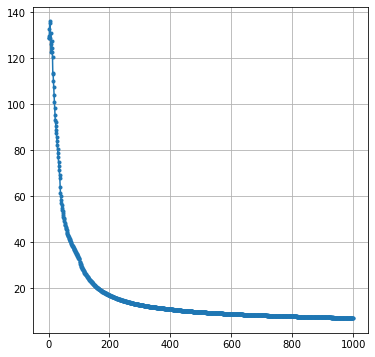

In [96]:
# Netword architecture:
d = X.shape[1] # input's dimension  : X.shape = (100,3)
n = [d,50,50,4] # nodes in each layer
N = len(n) # number of layers

# init weights randomly 
W = [None] * N
for l in range(1,N):
    W[l] = np.random.randn(n[l-1],n[l])*0.1
    print(f' W[{l}].shape =',W[l].shape)

# Train the netword:
J, Wout = gradient_descent(X,Y,W,T=1000,alpha=0.2)
plt.plot(J,'.-')
plt.grid()

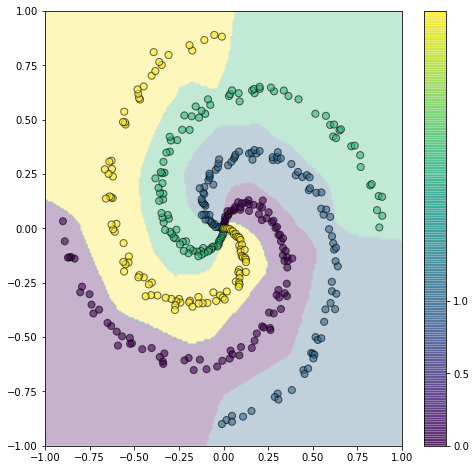

In [97]:
# visualize the results:

nn = 200
x1_set = np.linspace(-1,1,nn)
x2_set = np.linspace(-1,1,nn)

X1,X2 = np.meshgrid(x1_set,x2_set)
xx = np.c_[np.ones(nn*nn),X1.flatten(),X2.flatten()]
_, a = forward_propagation(xx, Wout) 
yhat = np.argmax(a[-1], axis=1)
G_grid = yhat.reshape(nn,nn)

plt.figure(figsize=(8,8))
plt.contourf(x1_set,x2_set,G_grid, 100,alpha=0.3,antialiased=True)
plt.scatter(X[:,1],X[:,2],s=50,c=Y,edgecolor='k',alpha=0.6)
plt.colorbar(ticks=[ 0,0.5, 1])

plt.show()